# Análisis Exploratorio de Datos (EDA) del Dataset de Candidatos
Este notebook realiza un análisis exploratorio detallado del dataset de candidatos (`candidates.csv`), cargado previamente en la tabla `raw_candidates` de PostgreSQL. El objetivo es entender la estructura, distribución y relaciones de los datos, identificando patrones, inconsistencias y posibles insights. Dado que los datos fueron generados aleatoriamente según la consigna del workshop, las interpretaciones deben considerarse con cautela, ya que anomalías como correos repetidos podrían ser artefactos de la generación y no necesariamente reflejar un comportamiento real, como reaplicaciones.

---

## Configuración del Entorno
Aquí se importan las librerías necesarias y se configura la conexión con la base de datos PostgreSQL.

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

load_dotenv()
connection_string = f"postgresql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"
engine = create_engine(connection_string)

## Preparación de los Datos
En esta sección, cargamos los datos desde la tabla `raw_candidates`, renombramos las columnas para mayor claridad, verificamos datos nulos y duplicados, y ajustamos los tipos de datos para un análisis eficiente.

In [178]:
# Cargar datos desde PostgreSQL
query = "SELECT * FROM raw_candidates;"
df = pd.read_sql(query, engine)

# Renombrar columnas para mayor claridad (inspirado en temp_002_candidatesEDA.ipynb)
df.rename(columns={
    'First Name': 'first_name',
    'Last Name': 'last_name',
    'Email': 'email',
    'Application Date': 'application_date',
    'Country': 'country',
    'YOE': 'years_of_experience',
    'Seniority': 'seniority',
    'Technology': 'technology',
    'Code Challenge Score': 'code_challenge_score',
    'Technical Interview Score': 'technical_interview_score'
}, inplace=True)
df['application_date'] = pd.to_datetime(df['application_date'], format='mixed')
df.head()

,first_name,last_name,email,application_date,country,years_of_experience,seniority,technology,code_challenge_score,technical_interview_score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [179]:
# Verificar datos nulos
null_counts = df.isnull().sum()
print("Valores nulos por columna:\n", null_counts)

# Verificar duplicados (filas completas)
duplicates = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates}")

# Verificar duplicados por email
email_duplicates = df['email'].duplicated().sum()
print(f"Número de emails duplicados (excluyendo el primero): {email_duplicates}")

# Revisión de valores duplicados
email_duplicates = df.duplicated(subset='email', keep=False).sum()
print("Registros que comparten el mismo email:", email_duplicates)
# Opcional: mostrar algunos registros duplicados por email
if email_duplicates > 0:
    duplicated_emails_df = df[df.duplicated(subset='email', keep=False)].sort_values('email')
    display(duplicated_emails_df.head(10))

# Aclaración sobre emails repetidos (dado el contexto ficticio)
print("""
Nota: Los correos electrónicos repetidos podrían interpretarse como reaplicaciones en un contexto real, pero dado que los datos son generados aleatoriamente, \nestas repeticiones son más probablemente un artefacto de la generación y no necesariamente indican un comportamiento significativo. Se explorarán más a fondo en el análisis.
""")

Valores nulos por columna:
 first_name                   0
last_name                    0
email                        0
application_date             0
country                      0
years_of_experience          0
seniority                    0
technology                   0
code_challenge_score         0
technical_interview_score    0
dtype: int64
Número de filas duplicadas: 0
Número de emails duplicados (excluyendo el primero): 167
Registros que comparten el mismo email: 332


,first_name,last_name,email,application_date,country,years_of_experience,seniority,technology,code_challenge_score,technical_interview_score
15823,Herta,Bartoletti,abbigail94@yahoo.com,2022-02-20,Dominican Republic,21,Mid-Level,Client Success,5,8
31766,Gavin,Brakus,abbigail94@yahoo.com,2019-07-27,Croatia,4,Junior,DevOps,6,2
21805,Jayce,Blick,addison_bode@hotmail.com,2019-08-27,Luxembourg,4,Lead,Development - Backend,7,2
32069,Malika,Krajcik,addison_bode@hotmail.com,2019-02-02,Lithuania,24,Architect,Database Administration,10,3
41691,Lorine,Howe,alberta95@gmail.com,2019-05-28,Afghanistan,21,Junior,Adobe Experience Manager,7,2
2259,Nayeli,Kessler,alberta95@gmail.com,2018-07-22,Germany,25,Architect,Salesforce,9,1
20575,Kamille,Legros,alberto11@yahoo.com,2018-09-13,Taiwan,25,Architect,Business Intelligence,2,9
45066,Clint,Dickens,alberto11@yahoo.com,2018-12-03,Democratic People's Republic of Korea,27,Intern,Sales,0,4
23842,Oswald,Batz,alejandra17@hotmail.com,2018-02-06,Ecuador,19,Intern,Development - Backend,6,10
49819,Kaylin,Hills,alejandra17@hotmail.com,2019-02-24,Iceland,21,Architect,Development - FullStack,2,9



Nota: Los correos electrónicos repetidos podrían interpretarse como reaplicaciones en un contexto real, pero dado que los datos son generados aleatoriamente, 
estas repeticiones son más probablemente un artefacto de la generación y no necesariamente indican un comportamiento significativo. Se explorarán más a fondo en el análisis.



## Análisis Descriptivo
Esta sección examina las estadísticas básicas de las variables numéricas y categóricas del dataset, identificando tendencias, distribuciones y posibles inconsistencias.

In [180]:
# Estadísticas descriptivas de variables numéricas
numeric_stats = df[['years_of_experience', 'code_challenge_score', 'technical_interview_score']].describe()
print("Estadísticas descriptivas de variables numéricas:\n", numeric_stats)

# Distribución de variables categóricas principales
categorical_vars = ['seniority', 'technology', 'country']
for col in categorical_vars:
    print(f"\nDistribución de {col}:\n", df[col].value_counts().head(10))  # Top 10 para evitar sobrecarga

Estadísticas descriptivas de variables numéricas:
        years_of_experience  code_challenge_score  technical_interview_score
count         50000.000000          50000.000000               50000.000000
mean             15.286980              4.996400                   5.003880
std               8.830652              3.166896                   3.165082
min               0.000000              0.000000                   0.000000
25%               8.000000              2.000000                   2.000000
50%              15.000000              5.000000                   5.000000
75%              23.000000              8.000000                   8.000000
max              30.000000             10.000000                  10.000000

Distribución de seniority:
 seniority
Intern       7255
Mid-Level    7253
Trainee      7183
Junior       7100
Architect    7079
Lead         7071
Senior       7059
Name: count, dtype: int64

Distribución de technology:
 technology
Game Development                 

## Visualizaciones
Aquí se presentan visualizaciones para explorar las distribuciones y relaciones más relevantes del dataset, como seniority, tecnología, país y puntajes.

Text(0, 0.5, 'Cantidad')

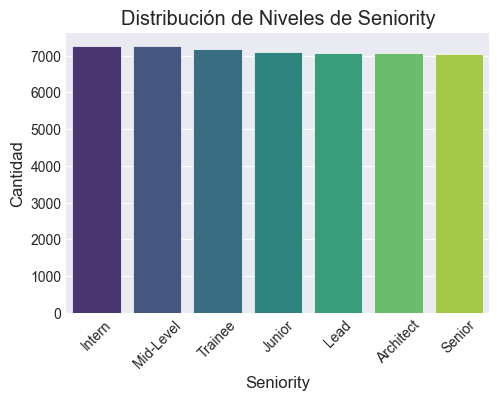

In [181]:
# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')

# Configurar tamaño de figuras
plt.figure(figsize=(12, 8))

# 1. Distribución de Seniority (bar chart)
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='seniority', hue='seniority', palette='viridis', legend=False)
plt.title('Distribución de Niveles de Seniority')
plt.xticks(rotation=45)
plt.xlabel('Seniority')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Tecnología')

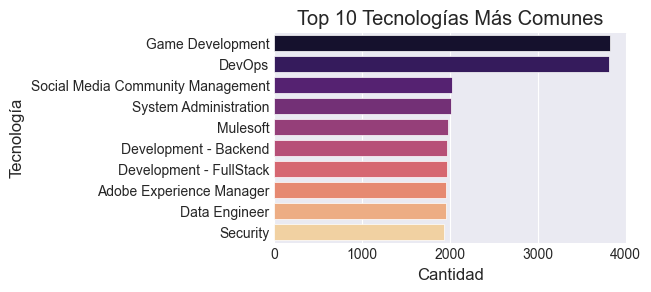

In [182]:
# 2. Distribución de Tecnologías (top 10, bar chart)
plt.subplot(2, 2, 2)
tech_counts = df['technology'].value_counts().head(10)
sns.barplot(x=tech_counts.values, y=tech_counts.index, hue=tech_counts.index, palette='magma', legend=False)
plt.title('Top 10 Tecnologías Más Comunes')
plt.xlabel('Cantidad')
plt.ylabel('Tecnología')

Text(0, 0.5, 'País')

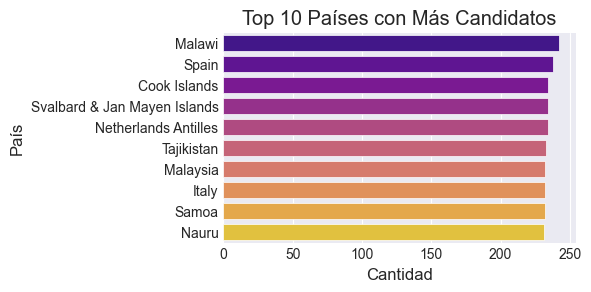

In [183]:
# 3. Distribución de Países (top 10, bar chart)
plt.subplot(2, 2, 3)
country_counts = df['country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, hue=country_counts.index, palette='plasma', legend=False)
plt.title('Top 10 Países con Más Candidatos')
plt.xlabel('Cantidad')
plt.ylabel('País')

Text(523.310606060606, 0.5, 'Puntuaje de Desafío de Código')

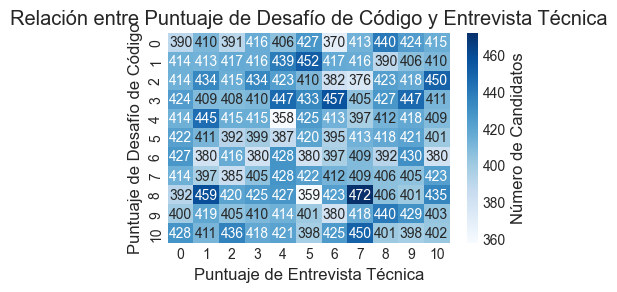

In [196]:
# 4. Relación entre Puntuajes (heatmap)
plt.subplot(2, 2, 4)
pivot_table = df.groupby(['code_challenge_score', 'technical_interview_score']).size().reset_index(name='count')
pivot = pivot_table.pivot(index='code_challenge_score', columns='technical_interview_score', values='count')
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Número de Candidatos'})
plt.title('Relación entre Puntuaje de Desafío de Código y Entrevista Técnica')
plt.xlabel('Puntuaje de Entrevista Técnica')
plt.ylabel('Puntuaje de Desafío de Código')

## Análisis de Relaciones e Inconsistencias
Aquí investigamos relaciones entre variables clave y posibles inconsistencias, considerando la naturaleza aleatoria de los datos.

Promedio de Años de Experiencia por Seniority:
 seniority
Senior       15.174529
Trainee      15.178616
Mid-Level    15.213291
Junior       15.324930
Architect    15.345105
Lead         15.365578
Intern       15.406892
Name: years_of_experience, dtype: float64


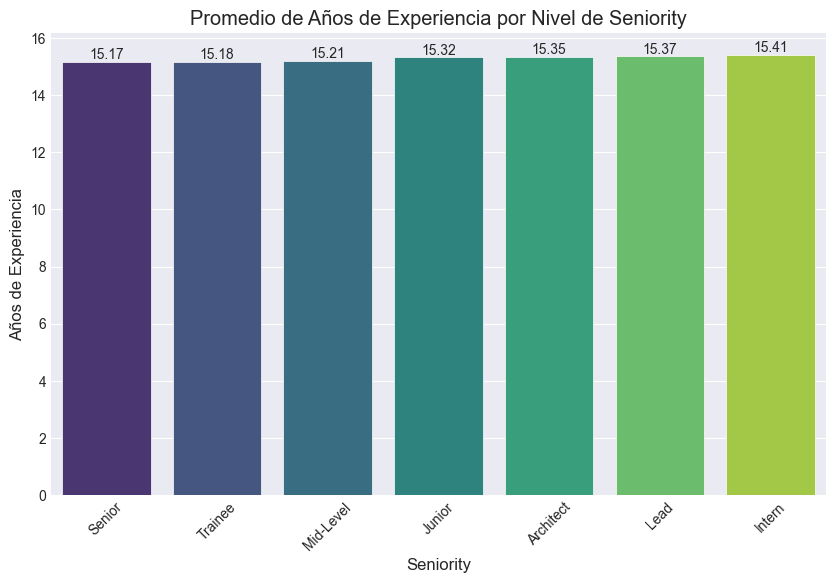

In [204]:
# Relación entre Years of Experience y Seniority (inspirado temp_002_candidates_eda.ipynb)
seniority_yoe = df.groupby('seniority')['years_of_experience'].mean().sort_values(ascending=True)
print("Promedio de Años de Experiencia por Seniority:\n", seniority_yoe)
# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=seniority_yoe.index, y=seniority_yoe.values, hue=seniority_yoe.index, palette='viridis', legend=False)
plt.title('Promedio de Años de Experiencia por Nivel de Seniority')
plt.xticks(rotation=45)
plt.xlabel('Seniority')
plt.ylabel('Años de Experiencia')

for i, v in enumerate(seniority_yoe.values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

In [206]:
# Análisis de correos repetidos (inspirado en temp_eda_report.ipynb y temp_data_cleaning_and_analysis.ipynb)
email_repetitions = df['email'].value_counts()
repeated_emails = email_repetitions[email_repetitions > 1].head(10)
print("\nTop 10 Emails Más Repetidos:\n", repeated_emails)

# Aclaración sobre correos repetidos
print("""
Dado que los datos son generados aleatoriamente, los correos repetidos no necesariamente indican reaplicaciones reales, como podría interpretarse en un contexto práctico. \nEs más probable que sean un resultado de la generación aleatoria y no tengan un significado significativo en este caso.
""")


Top 10 Emails Más Repetidos:
 email
marianne31@yahoo.com            3
fern70@gmail.com                3
isaiah24@yahoo.com              2
missouri65@yahoo.com            2
kelton91@hotmail.com            2
alberta95@gmail.com             2
alberto11@yahoo.com             2
sandra83@gmail.com              2
hildegard_prohaska@yahoo.com    2
julia8@yahoo.com                2
Name: count, dtype: int64

Dado que los datos son generados aleatoriamente, los correos repetidos no necesariamente indican reaplicaciones reales, como podría interpretarse en un contexto práctico. 
Es más probable que sean un resultado de la generación aleatoria y no tengan un significado significativo en este caso.



## Conclusiones
Este EDA revela varias características del dataset de candidatos:

- **Estructura del Dataset:** No se encontraron valores nulos ni filas duplicadas completas, pero se identificaron correos repetidos, que, debido a la naturaleza aleatoria de los datos, probablemente son artefactos de la generación y no indican reaplicaciones significativas.
- **Distribuciones:** Las variables categóricas como `seniority`, `technology` y `country` muestran distribuciones variadas, con algunos niveles o tecnologías más frecuentes que otros. Los puntajes numéricos (`code_challenge_score` y `technical_interview_score`) presentan distribuciones uniformes entre 0 y 10, lo cual es consistente con datos generados aleatoriamente.
- **Relaciones e Inconsistencias:** Existe una relación irregular entre `years_of_experience` y `seniority`, lo que podría ser esperado en datos ficticios. Las tecnologías y países podrían agruparse o filtrarse para análisis más específicos en pasos posteriores.
- **Limitaciones:** Dado el origen aleatorio, las interpretaciones deben ser cautelosas, y las anomalías (como correos repetidos o inconsistencias en seniority) no necesariamente reflejan patrones reales.

Estos hallazgos sentarán las bases para las transformaciones y visualizaciones en el próximo notebook.